In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### EDA 

In [8]:
df.shape

(8950, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
# sum of null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
#  filling null values with mean
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# checking duplicate rows
df.duplicated().sum()

0

In [19]:
# dropping Customer ID 
df.drop('CUST_ID',axis=1,inplace=True)

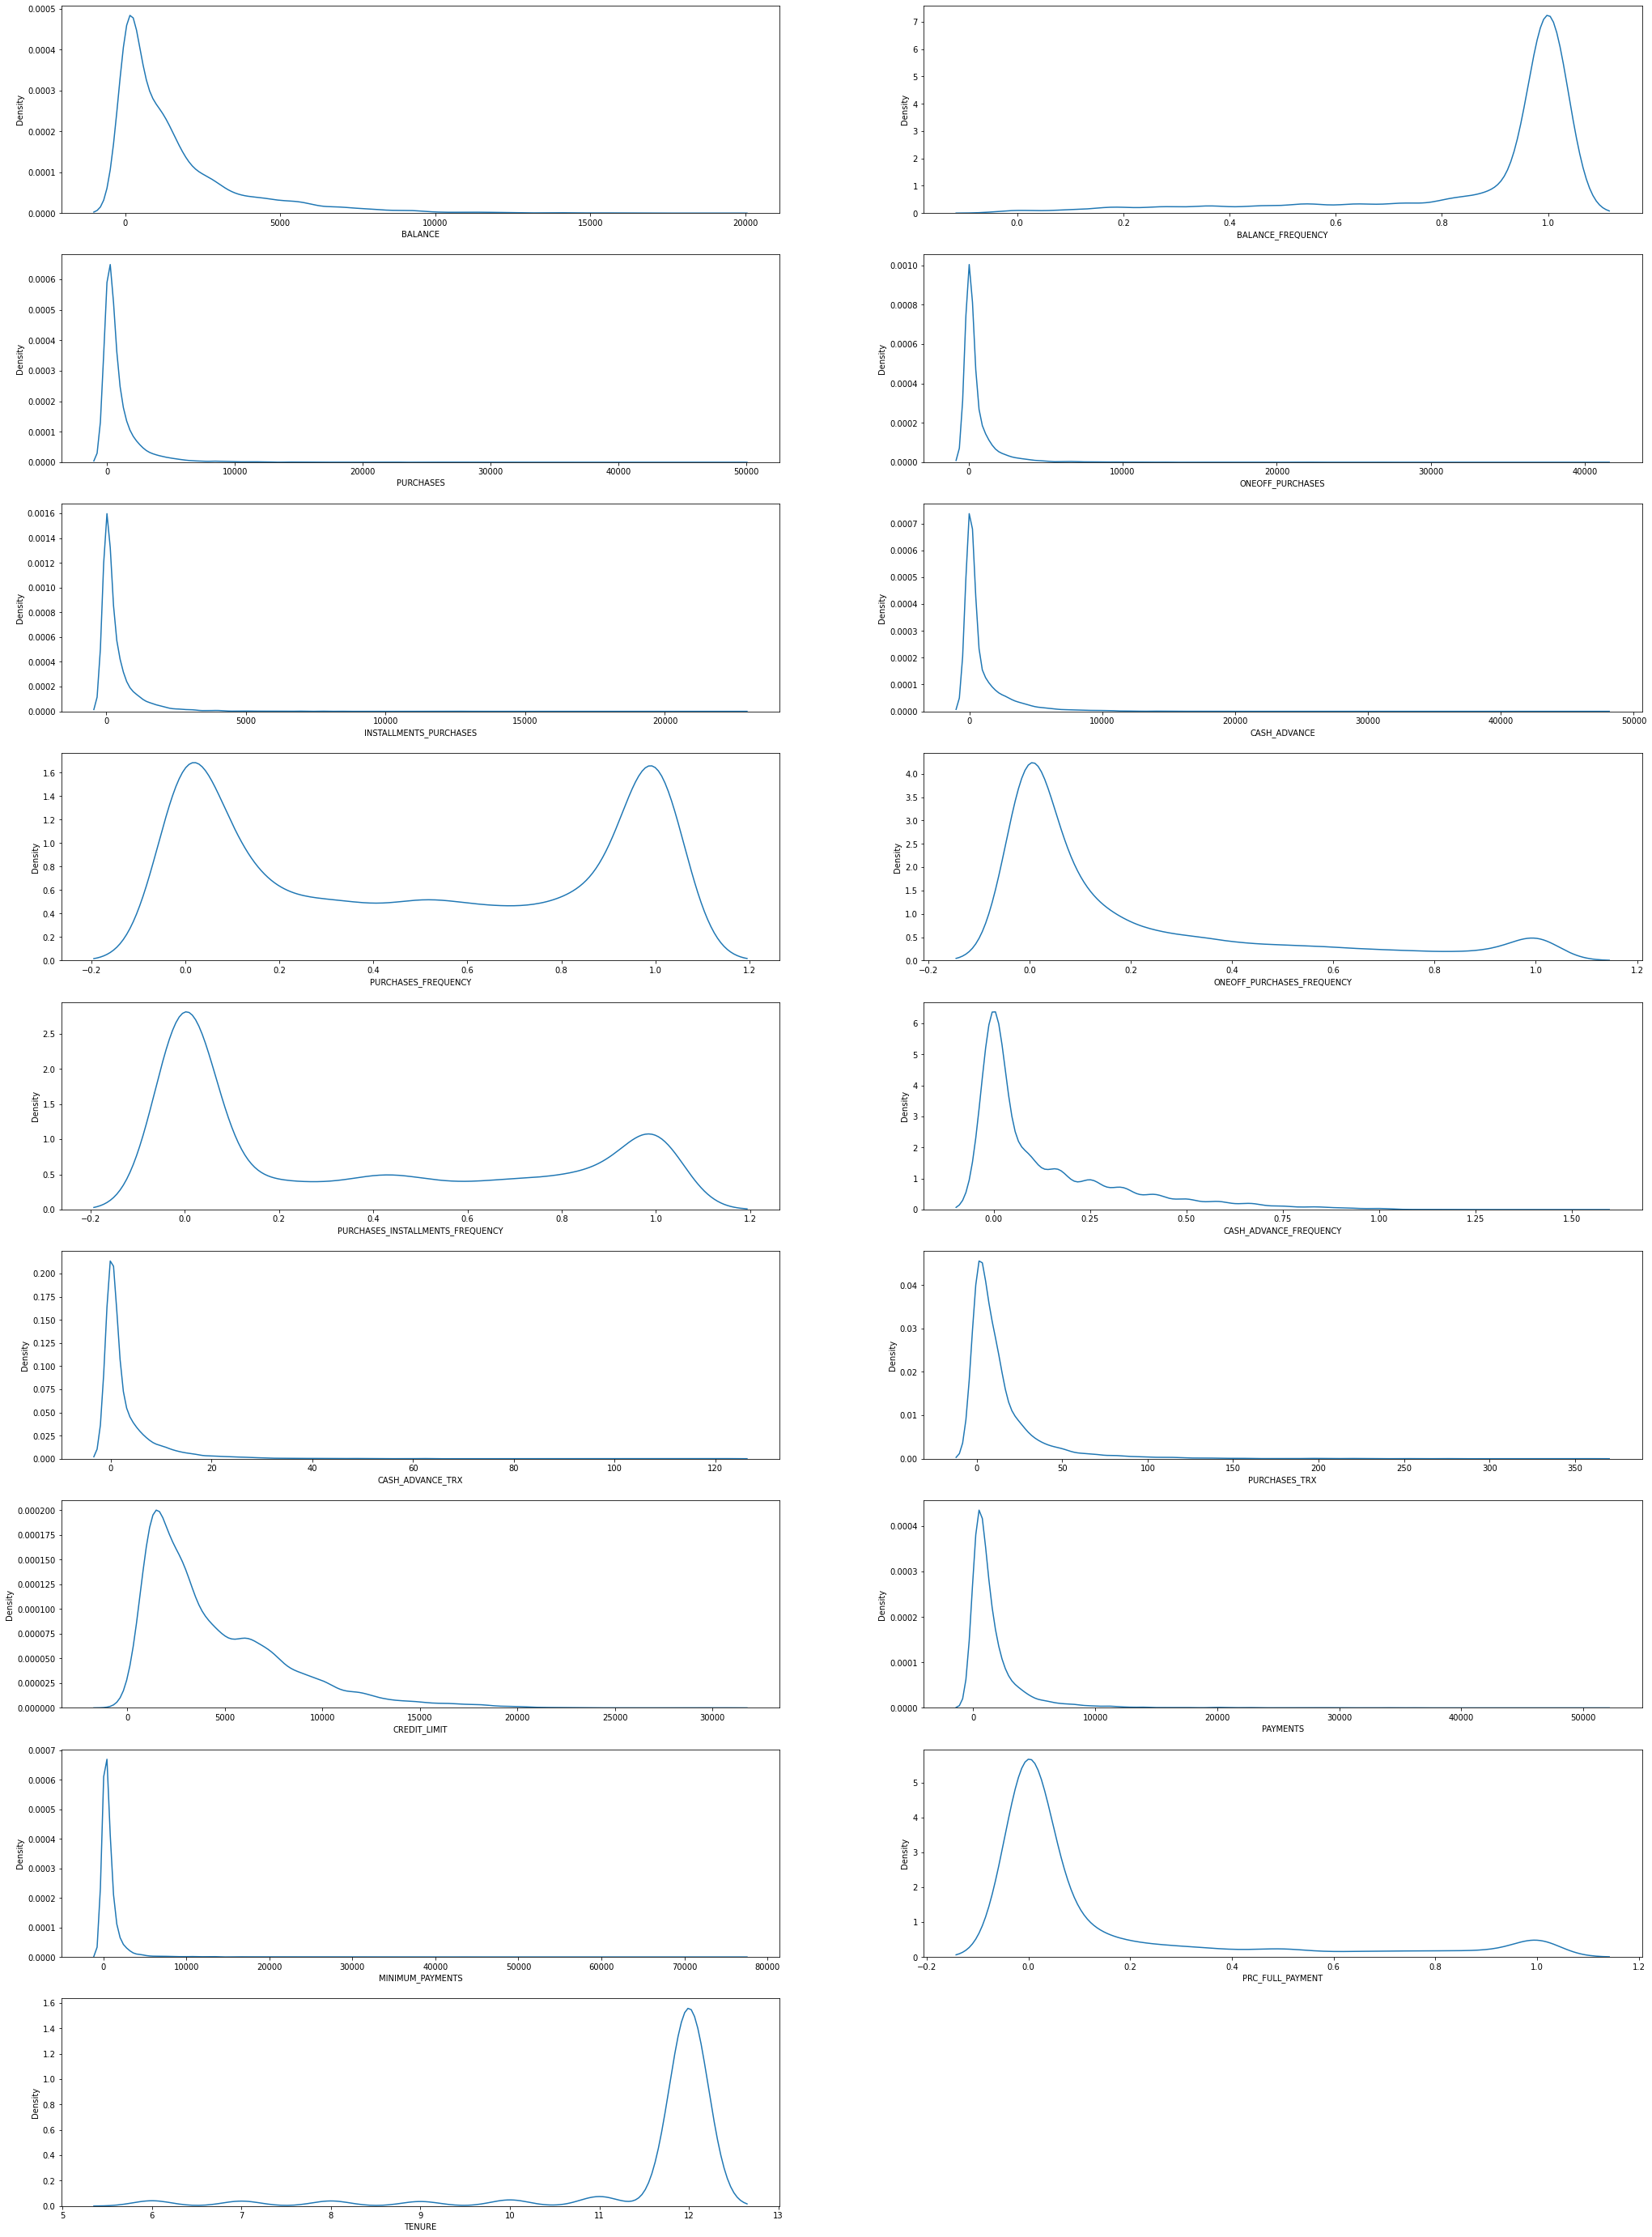

In [32]:
# kde (kernel density estimation) plot for each column for getting distribution
plt.figure(figsize=(35,50))
for i,col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9,2,i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()        

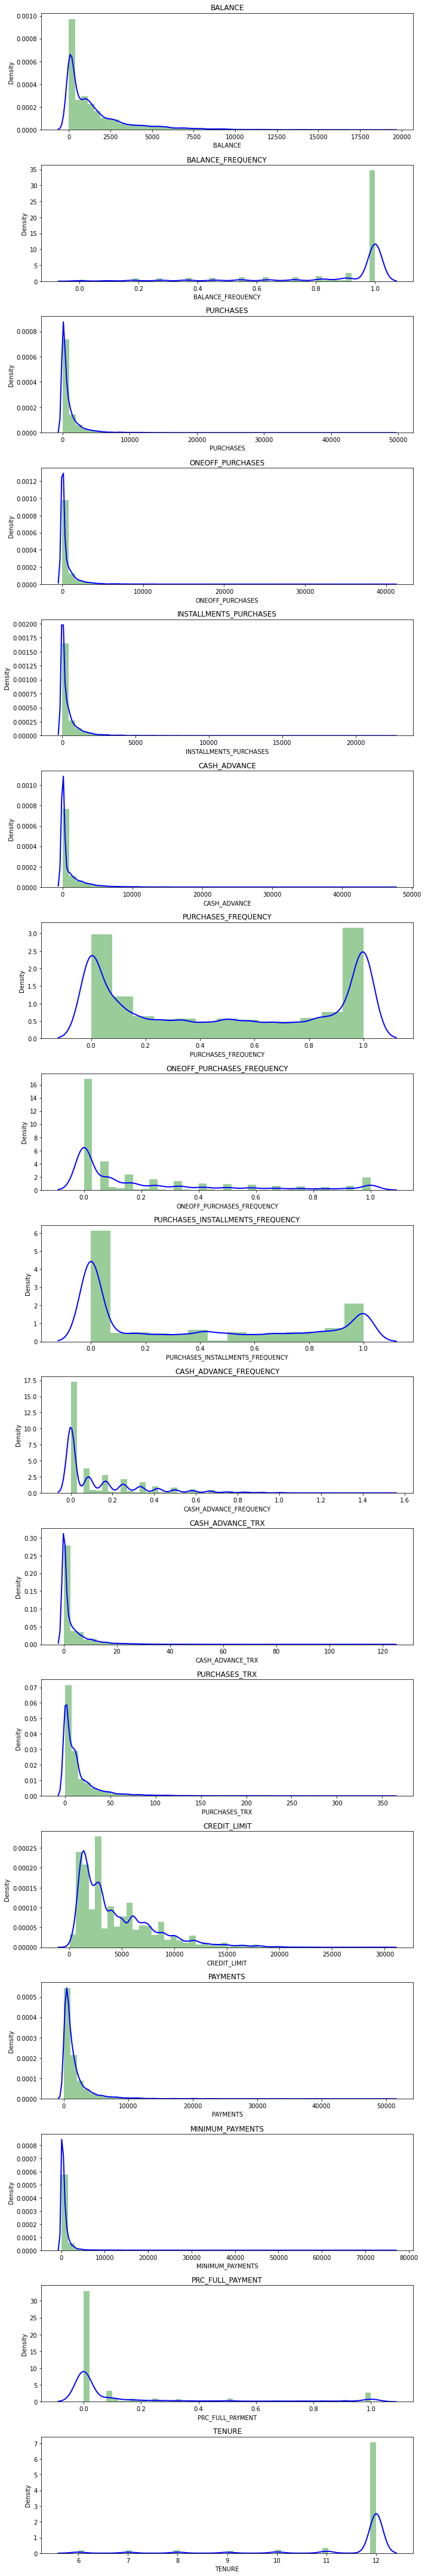

In [41]:
# distplot for each column (histogram + kde), 'bw':bandwidth for plot, 'lw':linewidth
plt.figure(figsize=(10,60))
for i in range(len(df.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]], kde_kws={'color':'b','bw':0.1,'lw':2,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
        
plt.tight_layout() 
# The tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters 
# to give specified padding

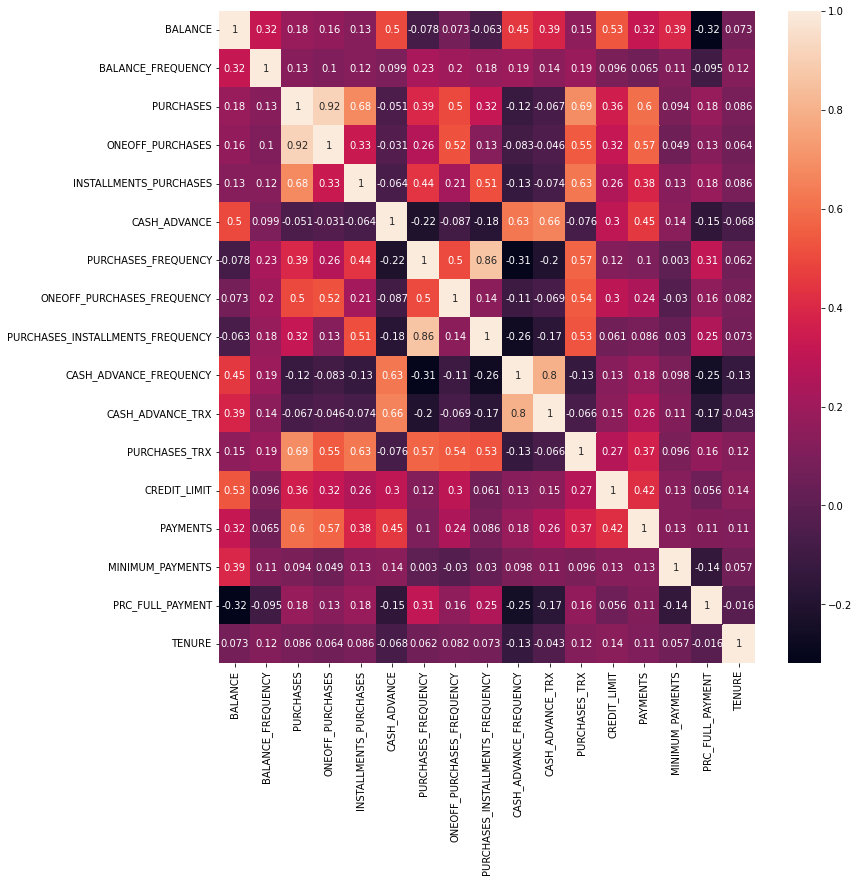

In [42]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [43]:
# scaling dataframe
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

In [56]:
# dimensionality reduction using PCA
from sklearn.decomposition import PCA

# converting data into 2D dataframe for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682222,-1.076482
1,-1.138289,2.506577
2,0.969692,-0.383251
3,-0.873629,0.043101
4,-1.599437,-0.688624
...,...,...
8945,-0.359637,-2.016281
8946,-0.564373,-1.639231
8947,-0.926211,-1.810914
8948,-2.336557,-0.658116


In [48]:
pd.DataFrame(scaled_df).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


### Model preparation

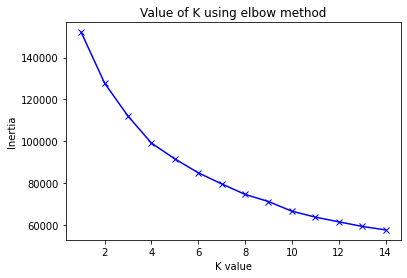

In [55]:
# finding k by elbow method
inertia = []
k_range = range(1,15)
for i in k_range:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmeans.inertia_)
plt.plot(k_range,inertia,'bx-') # 'bx-' to show points
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.title('Value of K using elbow method')
plt.show()

At k=4, graph is forming elbow

In [59]:
# model building using KMeans
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df) #predicting clusters

# concatinating cluster and pca output
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1) 

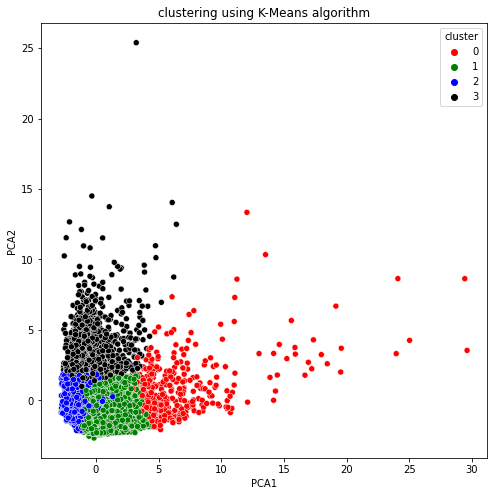

In [62]:
# visualizing clustered dataframe
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans, palette=['red','green','blue','black'])
plt.title('clustering using K-Means algorithm')
plt.show()

In [70]:
# finding all cluster centers
transform_data = pd.DataFrame(data = kmeans_model.cluster_centers_,columns=[df.columns])
transform_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.954485,0.462694,3.125845,2.713251,2.406470,-0.155091,1.136338,1.798653,1.065918,-0.319096,-0.170458,3.003251,1.429882,1.919096,0.477421,0.454703,0.324140
1,-0.321688,0.242574,0.109044,0.000926,0.255904,-0.366373,0.983721,0.317153,0.874138,-0.462599,-0.360303,0.296985,-0.077298,-0.138502,-0.091844,0.395041,0.057744
2,-0.265552,-0.368944,-0.343190,-0.230500,-0.387798,-0.182691,-0.797823,-0.389437,-0.714246,-0.101500,-0.164607,-0.474987,-0.334417,-0.262060,-0.119249,-0.258866,-0.052972
3,1.459578,0.384753,-0.234638,-0.163914,-0.253747,1.688972,-0.504848,-0.212939,-0.450201,1.745948,1.617143,-0.283580,0.838968,0.603821,0.490910,-0.406367,-0.097146


In [71]:
# inverse transform the data (transformed data using scaling will convert to original)
cluster_centers = scalar.inverse_transform(transform_data)
cluster_centers = pd.DataFrame(data = cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595
2,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
3,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312


In [73]:
# concatenating clusters with each rows
cluster_df = pd.concat([df,pd.DataFrame({'Cluster': kmeans_model.labels_})],axis=1)
cluster_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [75]:
cluster_1_df = cluster_df[cluster_df['Cluster']==0]
cluster_1_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.0,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
21,6369.531318,1.0,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.0,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,0
57,2386.330629,1.0,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.5,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,0


In [76]:
cluster_2_df = cluster_df[cluster_df['Cluster']==1]
cluster_2_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.0,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.0,12,1
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.0,12,1
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.0,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.0,12,1


In [77]:
cluster_3_df = cluster_df[cluster_df['Cluster']==2]
cluster_3_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,2
3,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,2
4,817.714335,1.000000,16.0,16.0,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,2


In [78]:
cluster_4_df = cluster_df[cluster_df['Cluster']==3]
cluster_4_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.0,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.5,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.0,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3


<AxesSubplot:xlabel='Cluster', ylabel='count'>

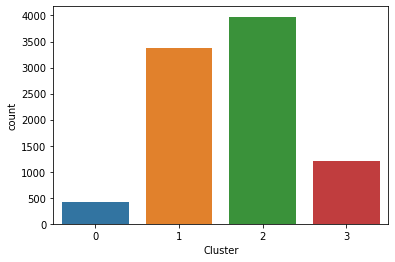

In [79]:
# distribution count of each cluster
sns.countplot(x = 'Cluster',data = cluster_df)

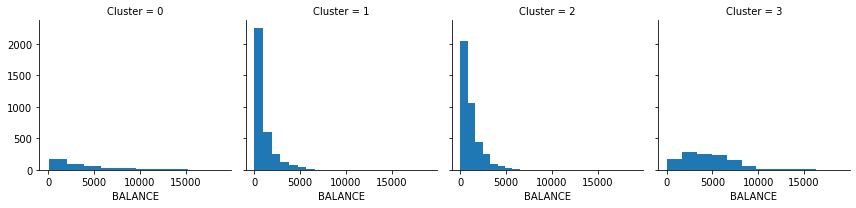

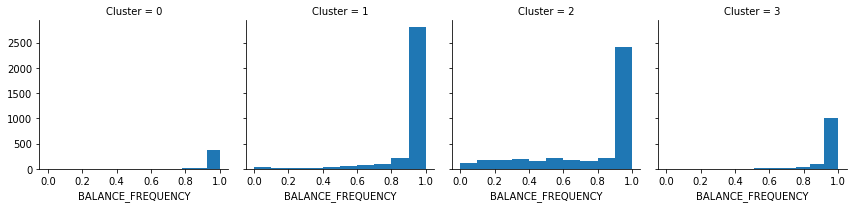

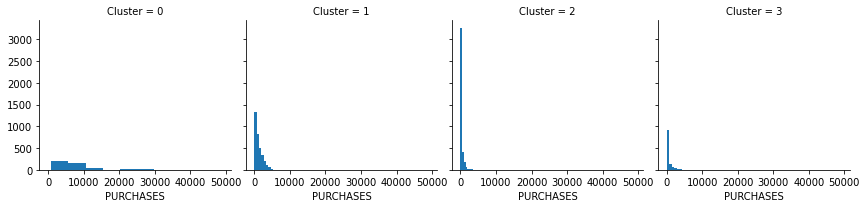

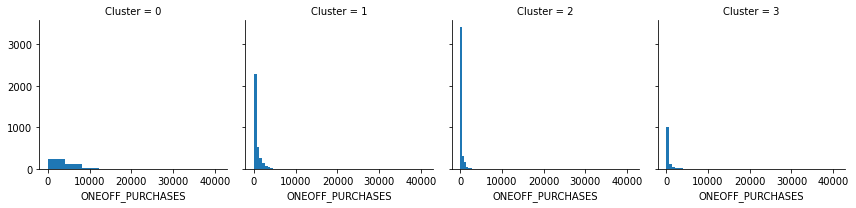

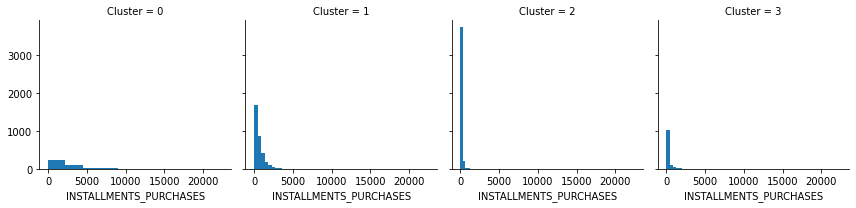

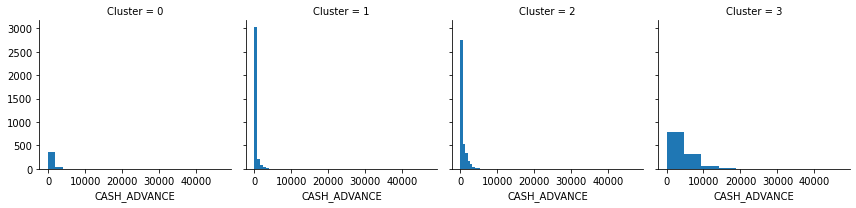

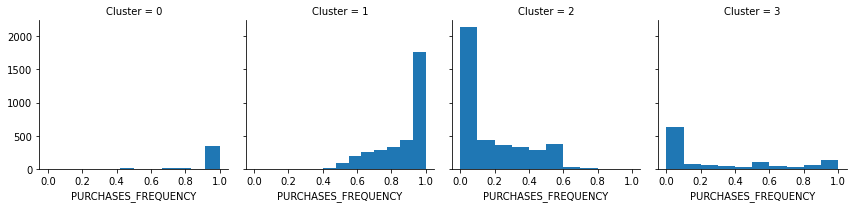

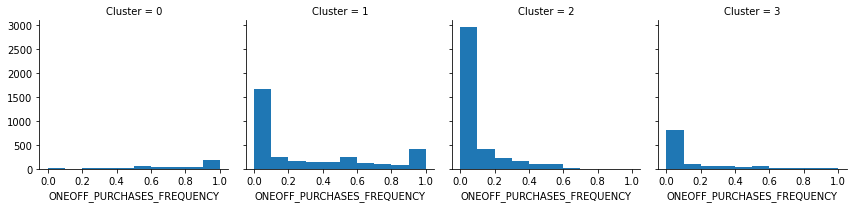

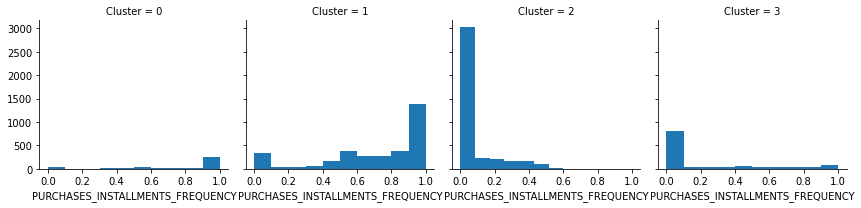

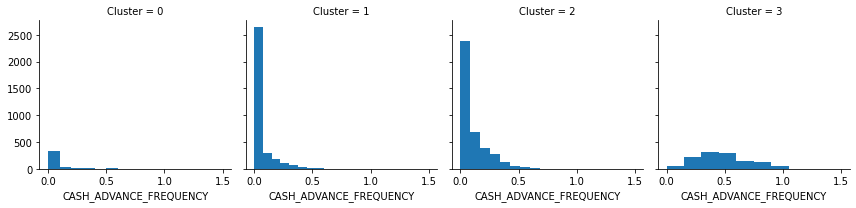

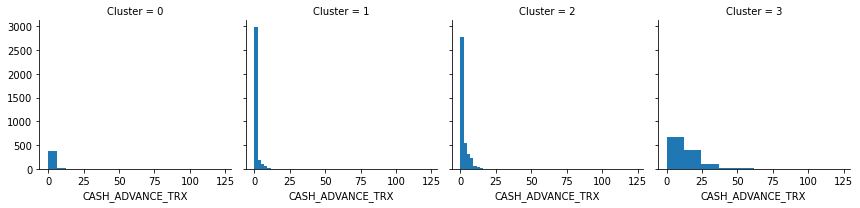

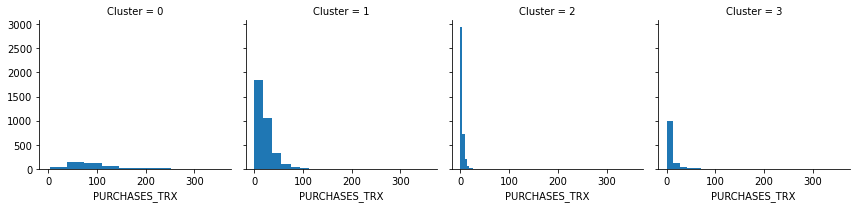

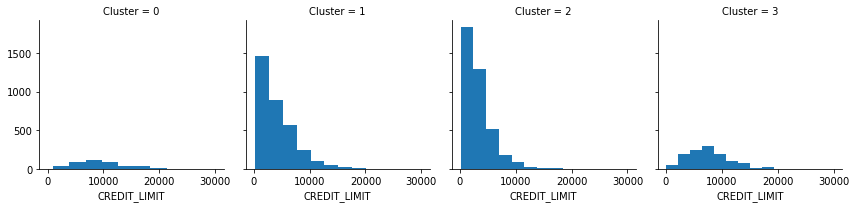

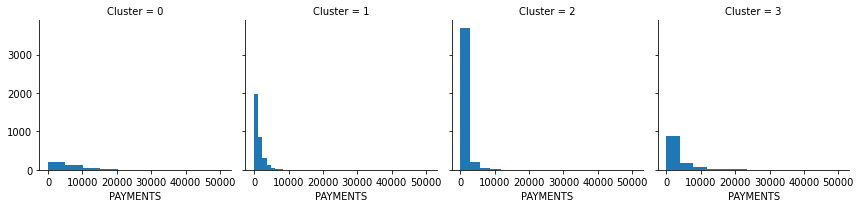

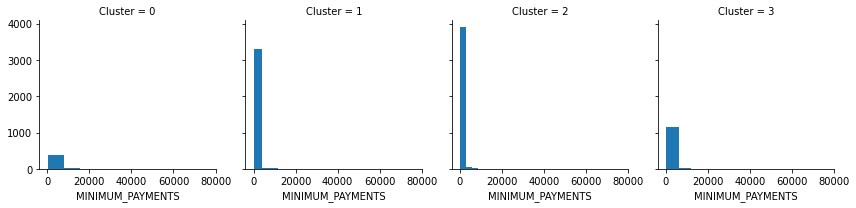

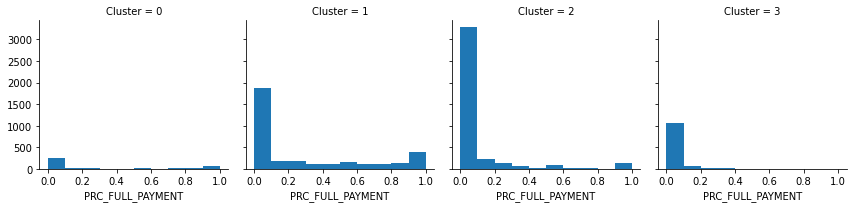

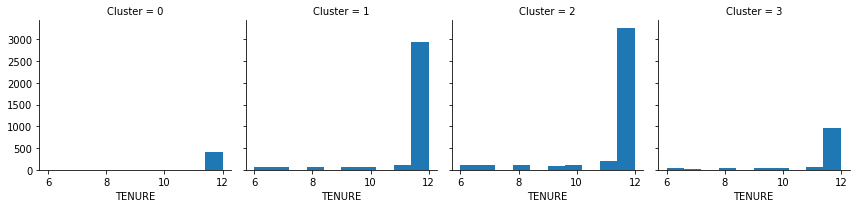

In [80]:
# plotting each column vs each cluster
for c in cluster_df.drop('Cluster',axis=1):
    grid = sns.FacetGrid(cluster_df,col='Cluster')
    grid = grid.map(plt.hist, c)
    
plt.show()    

In [81]:
# saving model
import joblib
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [82]:
# saving final clustered file
cluster_df.to_csv('clustered_customer_data.csv')

### Making model for clustering customers using decision tree

In [86]:
# splitting datasets
x = cluster_df.drop('Cluster',axis=1)
y = cluster_df['Cluster']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [87]:
x_train.shape

(6712, 17)

In [88]:
x_test.shape

(2238, 17)

In [89]:
# Decision Tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [90]:
model.score(x_test,y_test)

0.9410187667560321

In [92]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       100
           1       0.96      0.94      0.95       841
           2       0.94      0.96      0.95      1014
           3       0.91      0.88      0.89       283

    accuracy                           0.94      2238
   macro avg       0.92      0.93      0.93      2238
weighted avg       0.94      0.94      0.94      2238



In [93]:
# confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[ 96   3   1   0]
 [  9 791  32   9]
 [  2  26 970  16]
 [  1   8  25 249]]


Text(51.0, 0.5, 'Truth')

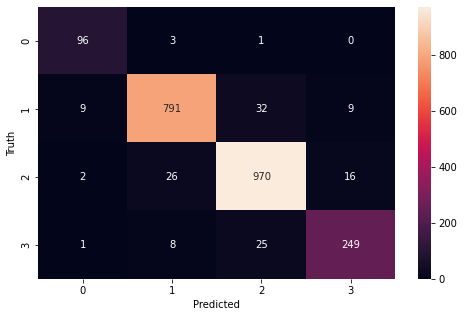

In [99]:
# heatmap of confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='g') #fmt='g' removes scientific annotation
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [97]:
# save decision tree model
import pickle
file = 'final_model.sav'
pickle.dump(model, open(file,'wb'))